In [46]:
# import library

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge

pd.set_option('display.max_rows', 200)


from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import pickle


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# load data

raw_data = pd.read_csv('../lab_data/Data_Customer.csv')
raw_data.drop(columns='Unnamed: 0', inplace=True)

In [48]:
raw_data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.22,No,Basic,College,2/18/11,Employed,M,48029,...,0.00,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.53,No,Basic,College,1/18/11,Unemployed,F,0,...,0.00,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.00,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,A
3,XL78013,Oregon,22332.44,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.00,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.07,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.37,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.44,No,Basic,College,1/6/11,Employed,F,61146,...,0.00,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.30,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.00,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.98,No,Premium,College,2/13/11,Employed,F,64195,...,4.00,6,Personal Auto,Personal L1,Offer1,Branch,618.29,SUV,Medsize,A


In [49]:
# helper functions

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    #ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    #ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)
    #MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    #MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))


    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_test, y_pred_test)

    #MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    #MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(y_train ,y_pred_train)
    MSE_test  = mean_squared_error(y_test , y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    #MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    #MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)
    #R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    #R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)


    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance, df_train, df_test

In [50]:
# clean data version 0.1 

raw_data.dropna(inplace=True)
data = raw_data._get_numeric_data()

In [51]:
data.dropna(inplace=True)

data = data[data['Income'] != 0]
#data = data[data['Total Claim Amount'] != 0]
#data = data[data['Months Since Last Claim'] != 0]
#data = data[data['Months Since Policy Inception'] != 0]
#data = data[data['Number of Open Complaints'] != 0]
#data.drop(columns='Number of Policies', inplace=True)


In [52]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,3370.00,3370.00,3370.00,3370.00,3370.00,3370.00,3370.00,3370.00
mean,8160.02,50489.36,93.76,15.06,47.71,0.38,2.95,379.71
std,7036.82,23997.43,35.67,10.15,28.02,0.90,2.39,258.17
min,2119.89,10037.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,4140.87,29099.75,68.00,6.00,23.00,0.00,1.00,206.55
50%,5894.14,48147.50,83.00,14.00,47.00,0.00,2.00,337.47
75%,9080.52,69618.50,109.00,23.00,71.00,0.00,4.00,500.50
max,83325.38,99961.00,296.00,35.00,99.00,5.00,9.00,2893.24


In [53]:
y = data['Total Claim Amount']
X = data.drop(columns='Total Claim Amount')

In [54]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [55]:
##### First model

#trans = PowerTransformer()
trans = StandardScaler()
model = LinearRegression()


trans.fit(X_train)


X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)


#y_train = trans.transform(y)


X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

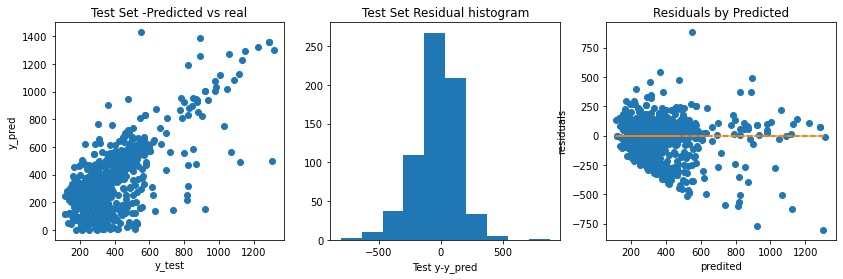

In [56]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test_lm})
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test_lm, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test_lm)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test_lm,y_test - y_pred_test_lm,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test_lm,np.zeros(len(y_pred_test_lm)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

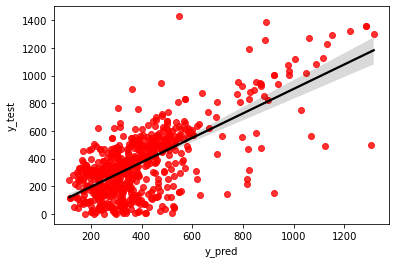

In [57]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [58]:
# second model
mod_lasso = Lasso()

In [59]:
mod_lasso.fit(X_train,y_train)

Lasso()

In [60]:
y_pred_train_lasso = mod_lasso.predict(X_train)
y_pred_test_lasso = mod_lasso.predict(X_test)

In [61]:
per_lasso, _, _ = model_performance(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)

In [62]:
r2_score(y_train, y_pred_train_lasso)

0.4516519941407957

In [63]:
y_train.describe()

count   2696.00
mean     383.13
std      260.88
min        0.77
25%      211.01
50%      340.80
75%      504.00
max     2893.24
Name: Total Claim Amount, dtype: float64

In [64]:
pd.DataFrame(y_pred_train_lasso).describe()

,0
count,2696.00
mean,383.13
std,173.92
min,106.12
25%,268.48
50%,346.45
75%,462.44
max,1338.74


In [65]:
per_lasso

,Error_metric,Train,Test
0,Mean error,-0.00,-25.37
1,Mean absolute error,136.25,129.29
2,Mean squared error,37305.75,32084.48
3,Root mean squared error,193.15,179.12
4,Mean absolute percentual error,232.74,464.24
5,R2,0.45,0.47


In [84]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=30) # n_neighbors = K

In [85]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=30)

In [86]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)


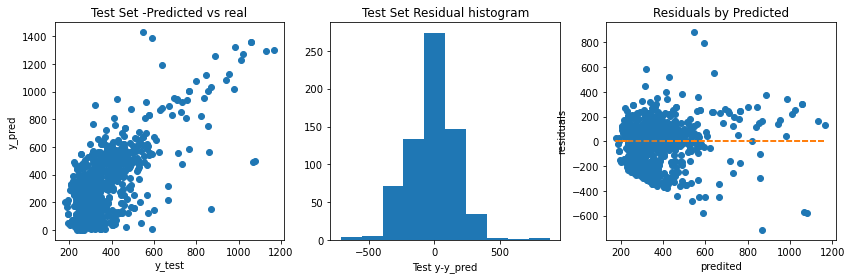

In [87]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred_test_knn})
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred_test_knn, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred_test_knn)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred_test_knn,y_test - y_pred_test_knn,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred_test_knn,np.zeros(len(y_pred_test_knn)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

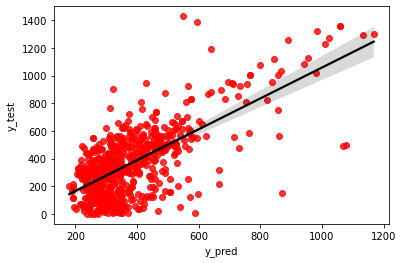

In [88]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [89]:
print(r2_score(y_test, y_pred_test_lm))
print(r2_score(y_test, y_pred_test_knn))

0.469969003453919
0.46456789770232043


In [90]:
per, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
per_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

In [91]:
per

,Error_metric,Train,Test
0,Mean error,-0.00,-25.46
1,Mean absolute error,136.33,129.47
2,Mean squared error,37297.04,32225.04
3,Root mean squared error,193.12,179.51
4,Mean absolute percentual error,232.43,463.95
5,R2,0.45,0.47


In [92]:
per_knn

,Error_metric,Train,Test
0,Mean error,11.48,-13.23
1,Mean absolute error,140.48,137.81
2,Mean squared error,37484.27,32553.42
3,Root mean squared error,193.61,180.43
4,Mean absolute percentual error,228.53,610.47
5,R2,0.45,0.46
